In [1]:
%matplotlib inline  
# グラフのインライン表示
from extract import read_greped_text  # grpファイル読み込み % 加工する関数インポート

In [2]:
def read_greped_text(file: str):
    """
    `grep -A2 <search pattern> <infile> >> <outfile>`
    で抜き出して作成した<outfile>を引数として
    pandas.read_tableで読み込む

    引数:
        file: grepで抜き出したファイル名のフルパス(str型)
    戻り値:
        df: 'theta', 'phi', 'rcs_w', 'rcs_d'を列にしたデータフレーム(pd.DataFrame型)
    """
    with open(file, 'r', encoding='utf-8') as f:
        ll = len(f.readlines())
    a = set(i for i in range(3, ll))
    b = set(i for i in range(6, ll, 4))
    skiprows = list(a - b)
    df = pd.read_table(file,
                       delim_whitespace=True,
                       header=1,
                       usecols=[0, 1, 6],
                       skiprows=skiprows,
                       names=['theta', 'phi', 'rcs_w'])
    df['rcs_d'] = 10 * np.log10(df['rcs_w'])  # W -> dBm変換
    return df

# 2016/10/22
# rcs_161022_03.csvをヒストグラム化する
FEKOでRCSをdBmとして取り出している

In [18]:
file = './DATA/rcs_161022_03.csv'
df = pd.read_csv(file, skiprows=1,index_col=0)

In [19]:
df.columns=['theta %d' % i for i in range(85,96)]
df

,theta 85,theta 86,theta 87,theta 88,theta 89,theta 90,theta 91,theta 92,theta 93,theta 94,theta 95
Plane Wave Phi[deg],,,,,,,,,,,
0.0,0.1610,11.300,2.700,6.71000,9.5000,11.500,9.410,13.800,6.820,0.2910,12.2000
1.0,1.8800,10.700,-1.540,-6.05000,7.8900,11.900,-2.950,8.410,0.627,0.6540,11.3000
2.0,-1.0100,10.100,-7.070,6.06000,6.1000,11.000,9.280,12.400,5.440,-1.0200,8.4000
3.0,2.9800,6.220,6.440,-4.70000,2.9000,12.000,-2.570,2.200,3.870,-2.9400,7.6100
4.0,0.4450,6.660,2.960,7.27000,1.2200,17.100,10.900,6.010,-7.080,2.6800,3.5900
5.0,0.4640,-2.370,6.570,1.80000,6.9500,9.800,8.770,7.570,10.200,0.1880,-4.4500
6.0,-1.6600,-10.600,-8.020,6.77000,4.0900,15.300,9.390,7.810,6.170,-2.4200,0.9730
7.0,1.1400,3.740,8.630,-1.18000,7.3600,13.400,5.690,1.970,5.710,-7.6700,0.2870
8.0,0.5700,-3.570,-11.400,-2.23000,4.3100,11.600,-0.869,-1.910,0.605,-0.1320,-7.4600


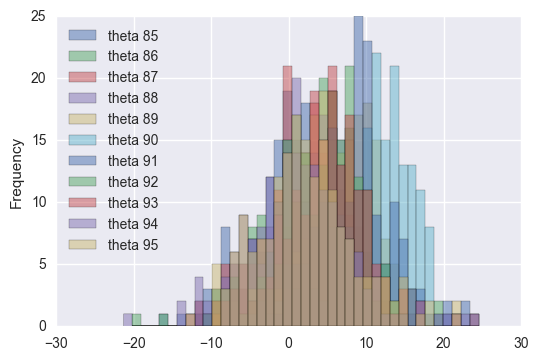

In [20]:
df.plot(bins=40, alpha=0.5, kind='hist')

In [21]:
dft=df.stack()
dft

Plane Wave Phi[deg]          
0.0                  theta 85     0.1610
                     theta 86    11.3000
                     theta 87     2.7000
                     theta 88     6.7100
                     theta 89     9.5000
                     theta 90    11.5000
                     theta 91     9.4100
                     theta 92    13.8000
                     theta 93     6.8200
                     theta 94     0.2910
                     theta 95    12.2000
1.0                  theta 85     1.8800
                     theta 86    10.7000
                     theta 87    -1.5400
                     theta 88    -6.0500
                     theta 89     7.8900
                     theta 90    11.9000
                     theta 91    -2.9500
                     theta 92     8.4100
                     theta 93     0.6270
                     theta 94     0.6540
                     theta 95    11.3000
2.0                  theta 85    -1.0100
                     theta 

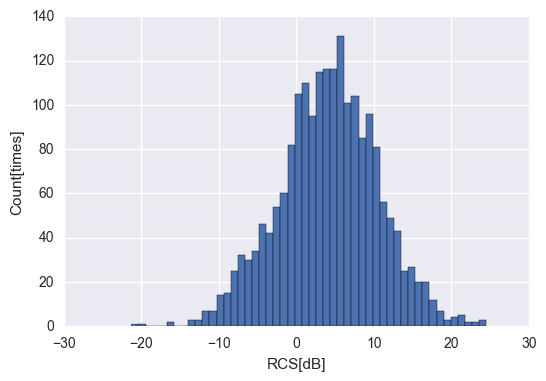

In [22]:
fig=dft.plot.hist(bins=50)
fig.set_xlabel('RCS[dB]')
fig.set_ylabel('Count[times]')
plt.savefig('hoge.png')

# 2016/10/24
# rcs_161022_04_0p1ind.outoutをヒストグラム化する

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさは300mm程度。

計算方向はthetaに振ってからphiに振る。
つまり、thetaを85-95まで回してから、
phiを次の角度に回す。

### 計算条件

* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 0.1 $^\circ$ 刻み
* 0 $^\circ$ <$\phi$ < 136 $^\circ$ , 0.1 $^\circ$ 刻み
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

In [24]:
df=read_greped_text('./DATA/rcs_161022_04_0p1ind.outout');df

,theta,phi,rcs_w,rcs_d
0,85.0,0.0,1.037760,0.160969
1,85.1,0.0,5.125190,7.097100
2,85.2,0.0,4.279680,6.314113
3,85.3,0.0,1.590010,2.013999
4,85.4,0.0,15.662200,11.948528
5,85.5,0.0,4.553400,6.583358
6,85.6,0.0,0.593388,-2.266612
7,85.7,0.0,3.380300,5.289552
8,85.8,0.0,16.231800,12.103667
9,85.9,0.0,2.809020,4.485548


読み込んだデータの確認

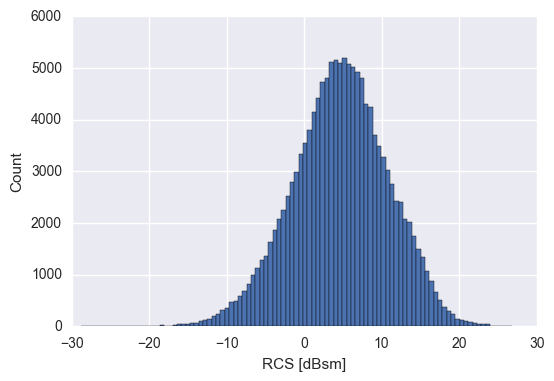

In [26]:
fig = df['rcs_d'].plot.hist(bins=100)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')

ほぼ正規分布の形になった

## RCSの統計値

### 統計値の確認

In [27]:
df['rcs_d'].describe()  # 統計値確認

count    138031.000000
mean          4.680550
std           6.181818
min         -29.319552
25%           0.685921
50%           4.802715
75%           8.833505
max          26.799963
Name: rcs_d, dtype: float64

### 中央値4.8、平均4.7
中央値≠平均値なので
十分量のデータが収集できたと思われる。


### 平均値4.7、標準偏差6.2
傾斜角85~95$^\circ$の範囲で周囲~~360$^\circ$すべて~~ 艦首進行方向から数えて136 $^\circ$の方向(ただしモデルは艦首から向かって左右対称とする。)からみたとき、

* 全体の6割の確率で-1.5~10.9dBm程度
* 全体の9割の確率で-7.7~17.1dBm程度

の値が出されると考えられる。


### 最大値26.8、最小値-29.3
最大値、最小値がでる$\theta$, $\phi$の条件は以下で検証した。

## 最小値、最大値が出る$\theta$, $\phi$の条件

### 最大値が出る条件

In [28]:
df[df['rcs_d']==df['rcs_d'].max()]  #最大値

,theta,phi,rcs_w,rcs_d
90977,92.7,90.0,478.626,26.799963


$\theta=92.7^\circ, \phi=90.0^\circ$

### 最小値が出る条件

In [29]:
df[df['rcs_d']==df['rcs_d'].min()]  #最小値

,theta,phi,rcs_w,rcs_d
3562,87.7,3.5,0.00117,-29.319552


$\theta=87.7, \phi=3.5$

In [34]:
rcs_high = df.sort_values(by=['rcs_d'])[-100:]  # 高RCSトップ100
rcs_high

,theta,phi,rcs_w,rcs_d
90968,91.8,90.0,198.436,22.976205
30450,89.9,30.1,198.956,22.987570
135635,94.3,134.2,199.116,22.991062
91057,90.6,90.1,199.122,22.991192
91860,90.1,90.9,199.972,23.009692
90765,91.7,89.8,200.074,23.011907
47369,85.0,46.9,200.095,23.012362
30462,91.1,30.1,200.211,23.014879
90967,91.7,90.0,200.434,23.019714
30388,93.8,30.0,200.951,23.030902


In [32]:
rcs_low = df.sort_values(by=['rcs_d'])[:100]  # 低RCSトップ10
rcs_low

,theta,phi,rcs_w,rcs_d
3562,87.7,3.5,0.001170,-29.319552
47488,86.8,47.0,0.003916,-24.071074
66849,93.8,66.1,0.004876,-23.119604
21022,86.4,20.8,0.005246,-22.801452
105839,94.2,104.7,0.005428,-22.653802
25344,94.4,25.0,0.005499,-22.597052
70585,93.7,69.8,0.005727,-22.421069
13134,85.4,13.0,0.006426,-21.920478
108567,94.3,107.4,0.006947,-21.582152
55580,88.0,55.0,0.007339,-21.343667


In [35]:
pol = pd.DataFrame(rcs_high.ix[:,['phi','rcs_d']]);pol

,phi,rcs_d
90968,90.0,22.976205
30450,30.1,22.987570
135635,134.2,22.991062
91057,90.1,22.991192
91860,90.9,23.009692
90765,89.8,23.011907
47369,46.9,23.012362
30462,30.1,23.014879
90967,90.0,23.019714
30388,30.0,23.030902


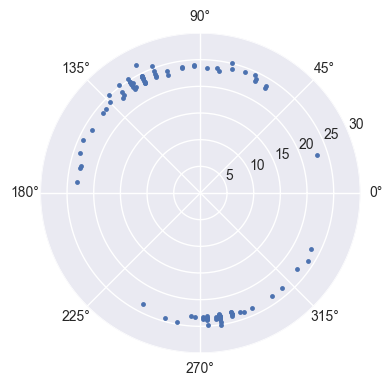

In [38]:
figp=plt.figure()
ax=figp.add_axes([0.1,0.1,0.8,0.8],polar=True)

x=np.arange(-180.0,190.0,10)
theta = (np.pi/180.0 )*x    # in radians
ax.plot(pol['phi'], pol['rcs_d'], marker='.', lw=0)
ax.set_rmax(30)

$\newpage$

__2016/10/25__

# Unicor 各アンテナのRCSをヒストグラム化する

## outファイルの加工手順

1. FEKOで計算を行うとoutファイルが吐き出される(例えばrcs_161024_01_esc.out)。
2. outファイルを加工を行うPCのローカルにコピーする。
3. outファイルの中のデータが格納されている部分だけ取り出す。
```sh
grep -A<num> <SEARCH PATTERN> <INFILE> > <OUTFILE>
```

ここでは以下のように、grpという拡張子のファイルに結果を保存した。

```sh
grep -A2 "LOCATION" rcs_161024_01_esc.out > rcs_161024_01_esc.grp
```

ちなみに、`grep -A2 "LOCATION" rcs*.out > rcs*.grp`とかいう感じに再帰的にやってみようとしたが、できなかった。なぜ？

### rcs_161024_01_esc.grpの中身

```
       LOCATION           ETHETA              EPHI         scattering cross sect.            POLARISATION
   THETA    PHI      magn.    phase     magn.    phase        in m*m                     axial r. angle   direction
   85.00    0.00   8.022E-03  -32.61  1.395E+00  -99.07      2.44670E+01                 0.0053    89.87   LINEAR
--
       LOCATION           ETHETA              EPHI         scattering cross sect.            POLARISATION
   THETA    PHI      magn.    phase     magn.    phase        in m*m                     axial r. angle   direction
   86.00    0.00   6.266E-03  -61.17  7.187E-01  -25.17      6.49195E+00                 0.0051    89.60   LINEAR
--
       LOCATION           ETHETA              EPHI         scattering cross sect.            POLARISATION
   THETA    PHI      magn.    phase     magn.    phase        in m*m                     axial r. angle   direction
   87.00    0.00   2.909E-03  -84.72  2.537E-01  176.12      8.08907E-01                 0.0113   -89.90   RIGHT 
--
...以下同様
```

LOCATIONから下の2行目(`grep -A2`で指定した)までが出力される。

## アンテナ各部のRCS計算の結果

### 計算条件

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさは300mm程度。

計算方向はthetaに振ってからphiに振る。
つまり、thetaを85-95まで回してから、
phiを次の角度に回す。


* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 1 $^\circ$ 刻み
* 0 $^\circ$ <$\phi$ < 180 $^\circ$ , 1 $^\circ$ 刻み
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

### 計算準備

In [9]:
%matplotlib inline  
# グラフのインライン表示
from extract import read_greped_text  # grpファイル読み込み % 加工する関数インポート

In [10]:
def read_greped_text(file: str):
    """
    `grep -A2 <search pattern> <infile> >> <outfile>`
    で抜き出して作成した<outfile>を引数として
    pandas.read_tableで読み込む

    引数:
        file: grepで抜き出したファイル名のフルパス(str型)
    戻り値:
        df: 'theta', 'phi', 'rcs_w', 'rcs_d'を列にしたデータフレーム(pd.DataFrame型)
    """
    with open(file, 'r', encoding='utf-8') as f:
        ll = len(f.readlines())
    a = set(i for i in range(3, ll))
    b = set(i for i in range(6, ll, 4))
    skiprows = list(a - b)
    df = pd.read_table(file,
                       delim_whitespace=True,
                       header=1,
                       usecols=[0, 1, 6],
                       skiprows=skiprows,
                       names=['theta', 'phi', 'rcs_w'])
    df['rcs_d'] = 10 * np.log10(df['rcs_w'])  # W -> dBm変換
    return df

$\newpage$

### ESCのRCS計算
ファイル名rcs_161024_01_escの結果

<img src="./plot_histgram_files/esc.PNG">

\includegraphics{./plot_histgram_files/esc.PNG}

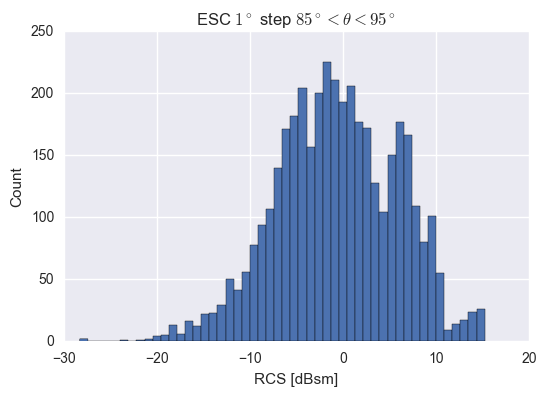

In [11]:
df_esc=read_greped_text('./DATA/rcs_161026_01_esc.grp')
fig = df_esc['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('ESC $1^\circ$ step $85^\circ < \\theta < 95^\circ$')
# fig.set_xlim([-40,20])

In [12]:
df_esc['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -0.633728
std         6.502463
min       -28.292251
25%        -5.054371
50%        -0.703701
75%         4.300041
max        15.244909
Name: rcs_d, dtype: float64

$\newpage$

### ESRのRCS計算
ファイル名rcs_161024_01_esrの結果

<img src="./plot_histgram_files/esr.PNG">

\includegraphics{./plot_histgram_files/esr.PNG}

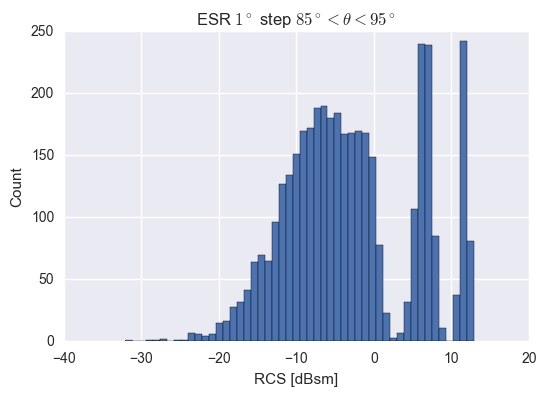

In [13]:
df_esr=read_greped_text('./DATA/rcs_161024_01_esr.grp')
fig = df_esr['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('ESR $1^\circ$ step $85^\circ < \\theta < 95^\circ$')
# fig.set_xlim([-30,20])

In [14]:
df_esr['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -2.965147
std         8.229054
min       -32.077891
25%        -8.976684
50%        -4.064717
75%         5.404070
max        12.897182
Name: rcs_d, dtype: float64

$\newpage$

### IFFのRCS計算
ファイル名rcs_161024_01_iffの結果

<img src="./plot_histgram_files/iff.PNG">

\includegraphics{./plot_histgram_files/iff.PNG}

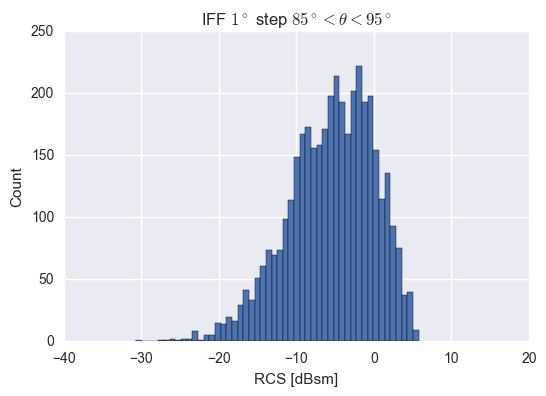

In [15]:
df_iff=read_greped_text('./DATA/rcs_161024_01_iff.grp')
fig = df_iff['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-40,20])
fig.set_title('IFF $1^\circ$ step $85^\circ < \\theta < 95^\circ$')

In [16]:
df_iff['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -5.494532
std         5.528014
min       -30.721597
25%        -9.133457
50%        -4.964511
75%        -1.321687
max         5.759541
Name: rcs_d, dtype: float64

$\newpage$

### LINK16のRCS計算
rcs_161024_01_link16の結果

<img src="./plot_histgram_files/link16.PNG">

\includegraphics{./plot_histgram_files/link16.PNG}

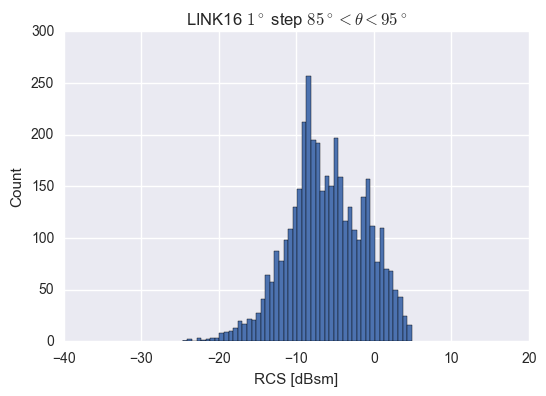

In [17]:
df_link16=read_greped_text('./DATA/rcs_161024_01_link16.grp')
fig = df_link16['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-40,20])
fig.set_title('LINK16 $1^\circ$ step $85^\circ < \\theta < 95^\circ$')

In [18]:
df_link16['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -6.095611
std         4.940842
min       -24.651924
25%        -9.220801
50%        -6.330795
75%        -2.365927
max         4.873533
Name: rcs_d, dtype: float64

$\newpage$

### ORQ-2のRCS計算
ファイル名rcs_161024_01_orq2の結果

<img src="./plot_histgram_files/orq2.PNG">

\includegraphics{./plot_histgram_files/orq2.PNG}

(-40, 20)

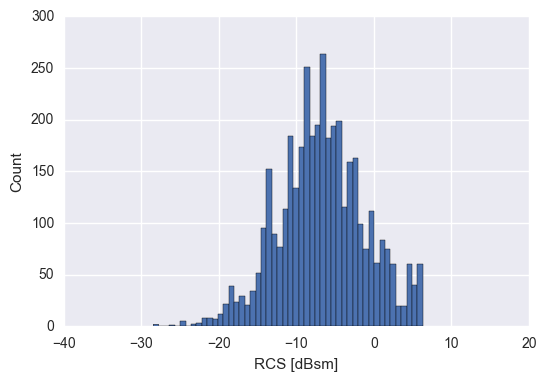

In [19]:
df_orq2=read_greped_text('./DATA/rcs_161024_01_orq2.grp')
fig = df_orq2['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-40,20])

In [20]:
df_orq2['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -6.693254
std         5.587300
min       -28.475068
25%       -10.314794
50%        -6.746651
75%        -3.080996
max         6.295452
Name: rcs_d, dtype: float64

$\newpage$

### UHFのRCS計算
ファイル名rcs_161024_01_uhfの結果

<img src="./plot_histgram_files/uhf.PNG">

\includegraphics{./plot_histgram_files/uhf.PNG}

(-40, 20)

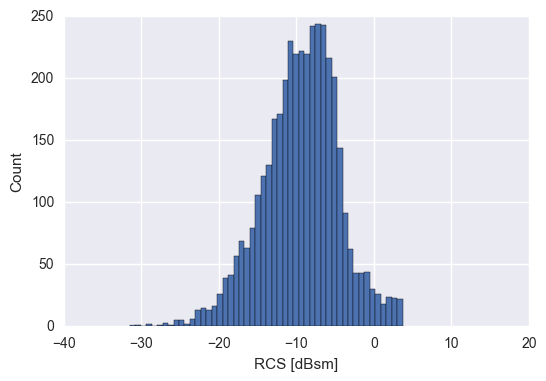

In [21]:
df_uhf=read_greped_text('./DATA/rcs_161024_01_uhf.grp')
fig = df_uhf['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-40,20])

In [22]:
df_uhf['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean       -9.415319
std         4.956979
min       -31.482281
25%       -12.466953
50%        -9.110157
75%        -6.163283
max         3.694070
Name: rcs_d, dtype: float64

$\newpage$

## アンテナの比較

In [23]:
(len(df_esc),len(df_esr),len(df_iff),len(df_orq2), len(df_link16),len(df_uhf))

(3960, 3960, 3960, 3960, 3960, 3960)

計算条件一緒だから、theta, phiは統合できます。

In [24]:
# phiとthetaをdf_allにいれて、各アンテナのrcs_dだけをリネームして一つのdfに入れる
df_all = pd.DataFrame(df_esc.ix[:, ['phi', 'theta']])
ant = ('esc', 'esr', 'iff', 'link16', 'orq2', 'uhf')
for dfs in ant:
    df_all['rcs_d_%s' % dfs] = eval("df_%s['rcs_d']" % dfs)
df_all.head()  # 最初の5行だけ表示

,phi,theta,rcs_d_esc,rcs_d_esr,rcs_d_iff,rcs_d_link16,rcs_d_orq2,rcs_d_uhf
0,0.0,85.0,-12.159622,-8.579768,-6.375797,-7.745020,-4.872836,3.192414
1,0.0,86.0,-2.967938,-12.544030,-2.839908,2.093944,-14.460721,-3.544500
2,0.0,87.0,-1.148396,0.713922,3.485093,-6.130607,-5.858744,-9.825159
3,0.0,88.0,10.098459,-3.345053,3.406206,-2.000119,1.274741,1.407091
4,0.0,89.0,-0.176094,6.015722,-1.319536,1.620623,6.145112,-0.841840


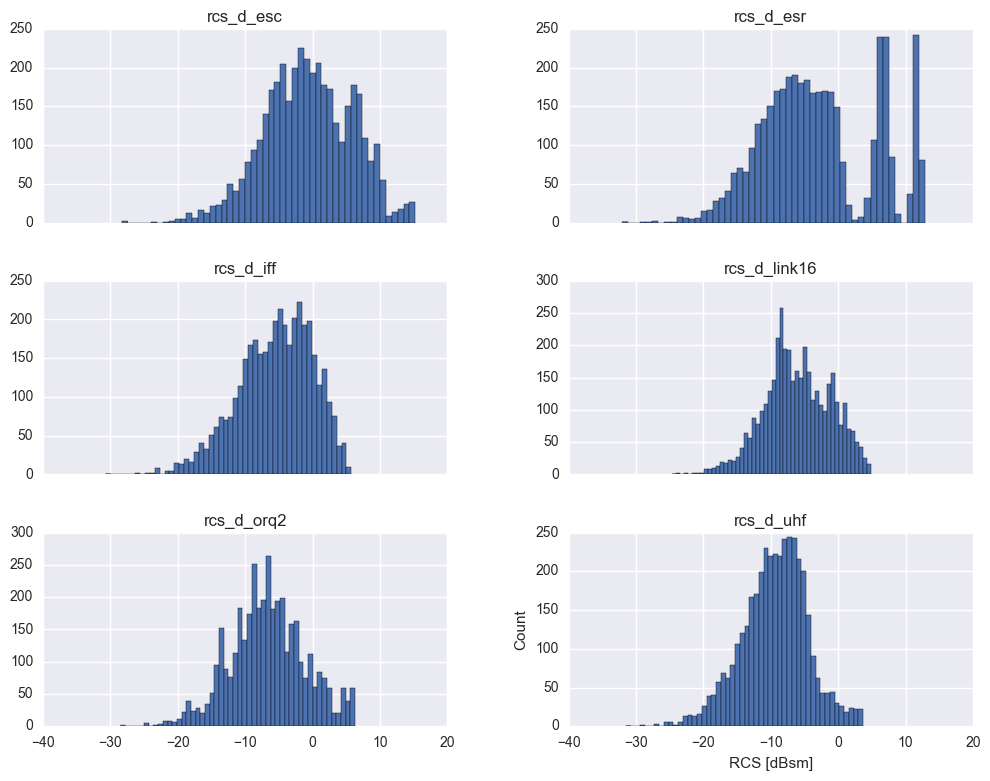

In [25]:
df_all.hist(column=df_all.columns[2:], bins=50, sharex=True, figsize=(12,9))
plt.xlabel('RCS [dBsm]')
plt.ylabel('Count')

In [28]:
df_all.ix[:, 2:].describe()  # 統計値の確認

,rcs_d_esc,rcs_d_esr,rcs_d_iff,rcs_d_link16,rcs_d_orq2,rcs_d_uhf
count,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,-0.633728,-2.965147,-5.494532,-6.095611,-6.693254,-9.415319
std,6.502463,8.229054,5.528014,4.940842,5.587300,4.956979
min,-28.292251,-32.077891,-30.721597,-24.651924,-28.475068,-31.482281
25%,-5.054371,-8.976684,-9.133457,-9.220801,-10.314794,-12.466953
50%,-0.703701,-4.064717,-4.964511,-6.330795,-6.746651,-9.110157
75%,4.300041,5.404070,-1.321687,-2.365927,-3.080996,-6.163283
max,15.244909,12.897182,5.759541,4.873533,6.295452,3.694070


escとesrがヒストグラムを右へずらす要因となっているか。

書き方のオプションとして、次のように重ねて描くこともできます。

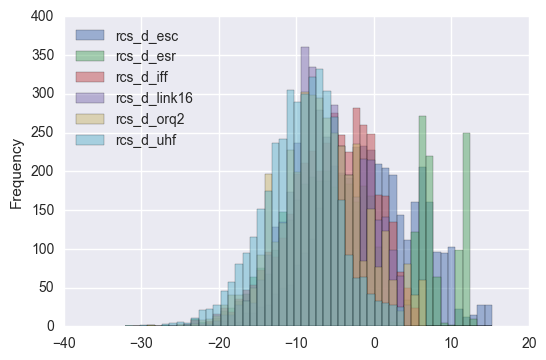

In [27]:
df_all.plot(y=df_all.columns[2:], bins=50, kind='hist', alpha=0.5 )

青と緑のescとesrが際立ってrcsをあげているのが一目瞭然です。

$\newpage$

## あきづきマストのRCS計算
ファイル名rcs_161024_01_v2の結果

### 計算条件

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさは30mm.

計算方向はthetaに振ってからphiに振る。
つまり、thetaを85-95まで回してから、
phiを次の角度に回す。


* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 0.2 $^\circ$ 刻み
* 0 $^\circ$ < $\phi$ < 164 ~~180~~ $^\circ$ , 0.2 $^\circ$ 刻み
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

<img src="./plot_histgram_files/AkidukiMast.PNG">

\includegraphics{./plot_histgram_files/AkidukiMast.PNG}

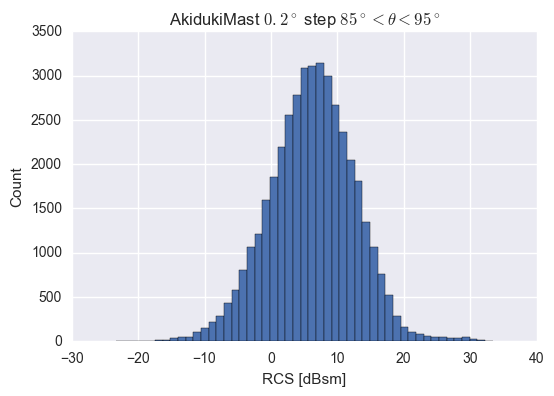

In [33]:
df_v2=read_greped_text('./DATA/rcs_161024_01_v2.grp')
fig = df_v2['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('AkidukiMast $0.2^\circ$ step $85^\circ < \\theta < 95^\circ$')

In [34]:
df_v2['rcs_d'].describe()  # 統計値の確認

count    41879.000000
mean         6.214212
std          6.453404
min        -24.408370
25%          2.085354
50%          6.328408
75%         10.480221
max         33.392228
Name: rcs_d, dtype: float64

___

In [81]:
max(set(df_v2['phi']))

164.19999999999999

2016/10/25 8:12に終わった計算は$\phi=164.2^\circ$で止まってしまったらしい･･･

In [90]:
re=180/0.2*10/0.2
print(round(re), len(df_v2))

45000 41879


ちゃんと計算終わっていれば45000ポイントあるはず

現時点41879ポイントしかない

___

$\newpage$

## Unicornマスト無し状態のRCS計算
ファイル名rcs_161025_02_wo_mast

### 計算条件

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさはFine(9/5$\lambda$. 10GHzなのでメッシュの大きさ 54mm)。

計算方向は$\\theta$に振ってから$\phi$に振る。
つまり、$\theta$を85-95まで回してから、
$\phi$を次の角度に回す。


* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 0.2 $^\circ$ 刻み
* 0 $^\circ$ < $\phi$ < 180 $^\circ$ , 0.2 $^\circ$ 刻み
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

<img src="./plot_histgram_files/161025_02_wo_mast.PNG">

\includegraphics{./plot_histgram_files/161025_02_wo_mast.PNG}

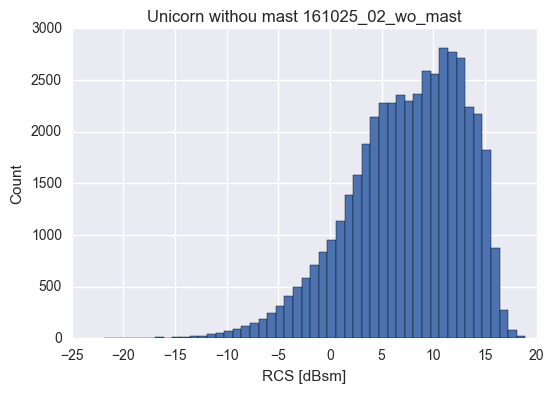

In [29]:
df_wo_mast=read_greped_text('./DATA/rcs_161025_02_wo_mast.grp')
fig = df_wo_mast['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('Unicorn withou mast 161025_02_wo_mast')

In [32]:
df_wo_mast['rcs_d'].describe()  # 統計値の確認

count    45951.000000
mean         7.487081
std          5.560428
min        -22.742860
25%          3.977384
50%          8.193893
75%         11.855535
max         18.908154
Name: rcs_d, dtype: float64

## 傾斜角$\theta$を変えてみる

### 傾斜$\pm5^\circ(85^\circ$ < $\theta < 95^\circ)$と$\pm1^\circ(89^\circ$ < $\theta < 91^\circ$)を比較する

**あきづきマスト、Unicorn $\pm5^\circ$傾斜の重ね合わせ比較用データ作成**

In [137]:
cc=pd.DataFrame([df_v2['rcs_d'], df_wo_mast['rcs_d']])  # データの抜き出しはu<x<vのbool型が使えないので、Temporaryとしてu<xのbool型で取り出す
deg5=cc.T
deg5.columns=['Akiduki', 'Unicorn']
deg5.head()

,Akiduki,Unicorn
0,10.012490,15.331719
1,9.417260,9.478654
2,8.556342,12.531586
3,13.269561,17.030342
4,20.742128,10.545824


(-30, 40)

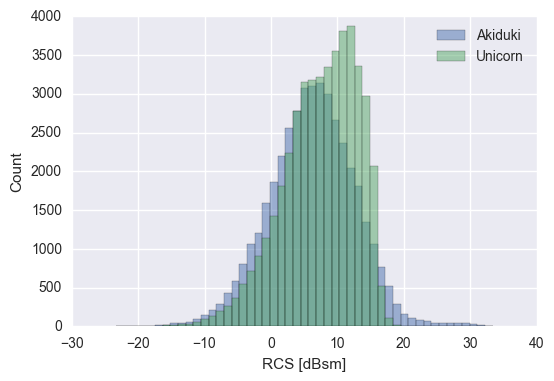

In [145]:
fig5d = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 )
fig5d.set_xlabel('RCS [dBsm]')
fig5d.set_ylabel('Count')
fig.set_xlim([-30,40])

In [146]:
deg5.describe()

,Akiduki,Unicorn
count,41879.000000,45951.000000
mean,6.214212,7.487081
std,6.453404,5.560428
min,-24.408370,-22.742860
25%,2.085354,3.977384
50%,6.328408,8.193893
75%,10.480221,11.855535
max,33.392228,18.908154


**あきづきマスト $\pm1^\circ$傾斜のデータ作成**

In [35]:
a=df_v2[df_v2['theta']>=89]  # データの抜き出しはu<x<vのbool型が使えないので、Temporaryとしてu<xのbool型で取り出す
df_v2_nallow=a[a['theta']<=91]
# df_v2_nallow.head()  # 最初の５行だけ表示

**Unicorn $\pm1^\circ$傾斜のデータ作成**

In [36]:
a=df_wo_mast[df_wo_mast['theta']>=89]
df_wo_mast_nallow=a[a['theta']<=91]
# df_wo_mast_nallow.head()  # 最初の５行だけ表示

**あきづきマスト、Unicorn $\pm1^\circ$傾斜の重ね合わせ比較用データ作成**

In [37]:
dd=pd.DataFrame([df_v2_nallow['rcs_d'], df_wo_mast_nallow['rcs_d']])
deg1=dd.T
deg1.columns=['Akizuki', 'Unicorn']
# deg1.head()

(-30, 40)

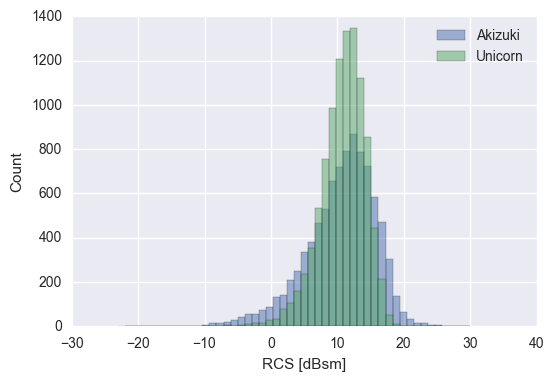

In [38]:
fig=deg1.plot(y=deg1.columns[:], bins=50, kind='hist', alpha=0.5 )
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])

In [136]:
deg1.describe()

,Akiduki,Unicorn
count,9031.000000,9911.000000
mean,10.511307,10.822717
std,5.285839,3.382037
min,-23.047566,-8.962818
25%,7.601931,8.926510
50%,11.303273,11.200011
75%,14.197840,13.190863
max,29.971460,18.908154


countが異なるのは、あきづきマストの計算範囲が$0^\circ < \phi < 136^\circ$までだったから。

___

$\newpage$

__2016/10/26__

# あきづきマスト vs Unicorn

### 計算条件

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさはFine(9/5$\lambda$. 10GHzなのでメッシュの大きさ 54mm)。

計算方向はthetaに振ってからphiに振る。
つまり、thetaを85-95まで回してから、
phiを次の角度に回す。


* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 0.2 $^\circ$ ステップ
* 0 $^\circ$ < $\phi$ < 180 $^\circ$ , 1 $^\circ$ ステップ
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

### 計算準備

In [3]:
%matplotlib inline  
# グラフのインライン表示
from extract import read_greped_text  # grpファイル読み込み % 加工する関数インポート

$\newpage$

## あきづきマストのRCS計算
ファイル名rcs_161026_01_Akidukiv3の結果

<img src="./plot_histgram_files/AkidukiMastv3.PNG">

\includegraphics{./plot_histgram_files/AkidukiMastv3.PNG}

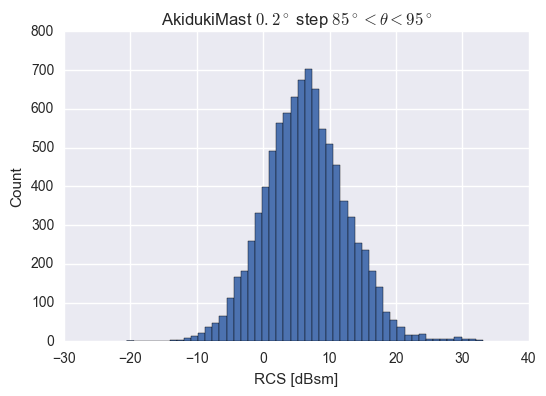

In [4]:
df_v3=read_greped_text('./DATA/rcs_161026_01_Akidukiv3.grp')
fig = df_v3['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('AkidukiMast $0.2^\circ$ step $85^\circ < \\theta < 95^\circ$')

In [5]:
df_v3['rcs_d'].describe()  # 統計値の確認

count    9231.000000
mean        6.425531
std         6.204805
min       -20.536494
25%         2.302330
50%         6.293199
75%        10.393209
max        33.076992
Name: rcs_d, dtype: float64

$\newpage$

## UnicornのRCS計算
ファイル名rcs_161026_01の結果

<img src='./plot_histgram_files/rcs_161026_01.PNG'>


\includegraphics{./plot_histgram_files/rcs_161026_01.PNG}

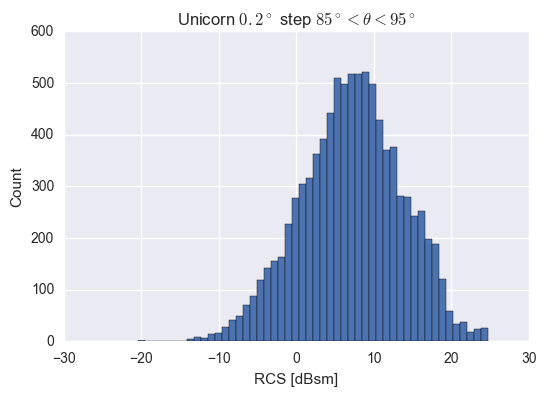

In [29]:
df_uni=read_greped_text('./DATA/rcs_161026_01.grp')
fig = df_uni['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('Unicorn $0.2^\circ$ step $85^\circ < \\theta < 95^\circ$')

In [30]:
df_uni['rcs_d'].describe()  # 統計値の確認

count    9231.000000
mean        7.191283
std         6.557917
min       -20.434133
25%         2.861138
50%         7.362212
75%        11.655752
max        24.779153
Name: rcs_d, dtype: float64

## 傾斜角$\theta$を変えてみる

### 傾斜$\pm5^\circ(85^\circ$ < $\theta < 95^\circ)$と$\pm1^\circ(89^\circ$ < $\theta < 91^\circ$)を比較する

**あきづきマスト、Unicorn $\pm5^\circ$傾斜の重ね合わせ比較用データ作成**

In [8]:
# 一つのデータフレームにまとめる
cc=pd.DataFrame([df_v3['rcs_d'], df_uni['rcs_d']])
deg5=cc.T
deg5.columns=['Akizuki', 'Unicorn']
# deg5  # 中身の確認

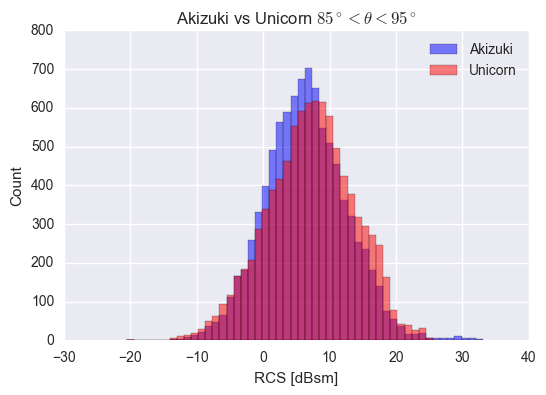

In [9]:
fig = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 ,color=('b','r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $85^\circ < \\theta < 95^\circ$')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C66F7F0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6AD5C0>]], dtype=object)

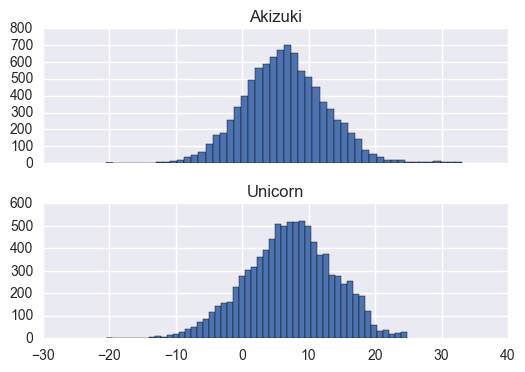

In [10]:
deg5.hist(bins=50, sharex=True, layout=(2,1))

重ね合わせた場合と重ね合わせない場合。
同じデータですので見やすいほうを使ってください。

In [11]:
deg5.describe()

,Akizuki,Unicorn
count,9231.000000,9231.000000
mean,6.425531,7.191283
std,6.204805,6.557917
min,-20.536494,-20.434133
25%,2.302330,2.861138
50%,6.293199,7.362212
75%,10.393209,11.655752
max,33.076992,24.779153


**あきづきマスト $\pm1^\circ$傾斜のデータ作成**

In [12]:
# データの抜き出しはu<x<vのbool型が使えないので
# Temporaryとしてu<xのbool型で取り出す
a=df_v3[df_v3['theta']>=89] 
df_v3_nallow=a[a['theta']<=91]
# df_v3_nallow#.head()  # 最初の５行だけ表示

**Unicorn $\pm1^\circ$傾斜のデータ作成**

In [13]:
a = df_uni[df_uni['theta']>=89]
df_uni_nallow=a[a['theta']<=91]
# df_uni_nallow # 中身確認

**あきづきマスト、Unicorn $\pm1^\circ$傾斜の重ね合わせ比較用データ作成**

In [14]:
dd=pd.DataFrame([df_v3_nallow['rcs_d'], df_uni_nallow['rcs_d']])
deg1=dd.T
deg1.columns=['Akizuki', 'Unicorn']
# deg1  # 中身の確認

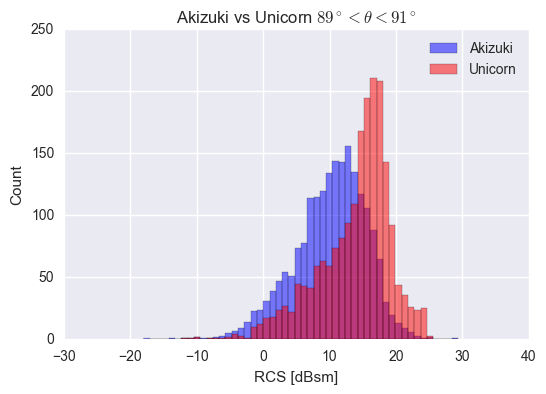

In [15]:
fig=deg1.plot(y=deg1.columns[:], bins=50, kind='hist', alpha=0.5, color=('b', 'r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $89^\circ < \\theta < 91^\circ$')

あきづきマストとUnicorn(マストあり、ESCあり)のデータを$\theta$の振れ幅$\pm1^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分が紫色に見えています。
Unicornの方が高い値にあることがわかります。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAA5898>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB2A358>]], dtype=object)

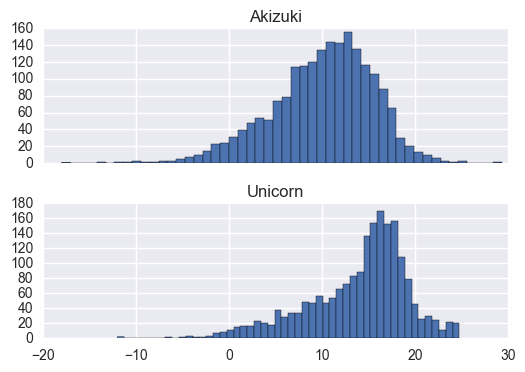

In [16]:
deg1.hist(bins=50, sharex=True, layout=(2,1))

重ね合わせた場合と重ね合わせない場合。
同じデータですので見やすいほうを使ってください。

In [17]:
deg1.describe()

,Akizuki,Unicorn
count,1991.000000,1991.000000
mean,10.100238,13.878427
std,5.482666,5.523590
min,-17.998557,-12.012458
25%,6.877530,10.945753
50%,10.763090,15.239064
75%,13.975028,17.530571
max,29.378457,24.779153


$\newpage$

_2016/10/26_

# あきづきマスト vs Unicorn(支柱無し)のRCS計算

<img src="./plot_histgram_files/AkidukiMastv3.PNG">

\includegraphics{./plot_histgram_files/AkidukiMastv3.PNG}

**あきづきマストのモデル**

<img src='./plot_histgram_files/rcs_161026_01.PNG'>

\includegraphics{./plot_histgram_files/rcs_161026_01.PNG}

**Unicornのモデル**

In [126]:
# データを読み込む
df_v3=read_greped_text('./DATA/rcs_161026_01_Akidukiv3.grp')   # あきづきマスト
df_uni=read_greped_text('./DATA/rcs_161026_01.grp') # Unicorn
df_uni_wo_mast=read_greped_text('./DATA/rcs_161026_01_wo_mast.grp')  # Unicorn(支柱無し)
df_uni_wo_mast_esc=read_greped_text('./DATA/rcs_161026_01_wo_mast_esc.grp')  # Unicorn(支柱, ESC無し)

## あきづきマスト vs UnicornのRCS計算比較

In [128]:
# 一つのデータフレームにまとめる
cc=pd.DataFrame([df_v3['rcs_d'], df_uni['rcs_d']])
deg5=cc.T
deg5.columns=['Akizuki', 'Unicorn']
# deg5  # 中身の確認

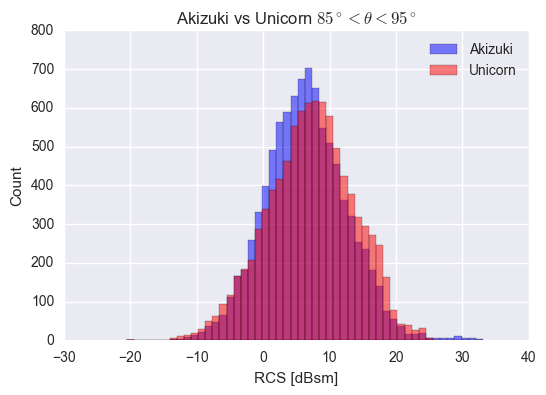

In [129]:
fig = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 ,color=('b','r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $85^\circ < \\theta < 95^\circ$')

あきづきマストとUnicorn(マストあり、ESCあり)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分が紫色に見えています。
ややUnicornの方が高い値にあることがわかります。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B742978>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B8BB748>]], dtype=object)

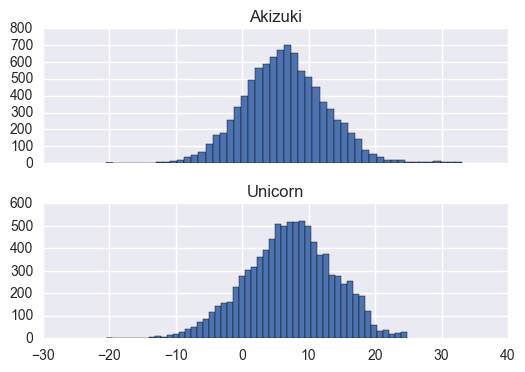

In [130]:
deg5.hist(bins=50, sharex=True, layout=(2,1))

重ねるか並べるかが違うだけで、データは同じです。

In [136]:
deg5.describe()  # 統計値確認

,Akiduki,Unicorn w/o Mast
count,9231.000000,9231.000000
mean,6.425531,6.209937
std,6.204805,6.608639
min,-20.536494,-24.600236
25%,2.302330,1.736247
50%,6.293199,6.205483
75%,10.393209,10.982923
max,33.076992,22.206833


上から

* データ数
* 平均値
* 標準偏差
* 最小値
* 第一四分位数
* 中央値
* 第三四分位数
* 最大値

を示しています。

あきづきマストとUnicorn(マストあり、ESCあり)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したPDFの代表的な統計値です。
グラフの重なりが、平均値、標準偏差、中央値がほぼ6台にあることから推測できます。

In [137]:
from driver import *

一つのデータフレームにまとめる操作は繰り返し使うので関数化しました。


```python
import pandas as pd
import numpy as np


def merge(ser_list: list, nameargs: list) -> pd.core.frame.DataFrame:
    """
    一つのデータフレームにまとめる
    引数:
        ser_list: シリーズが入ったリスト(list of pd.Series type)
        nameargs: 作成されるdfのcolumn名が入ったリスト(list of string type)
    戻り値:
        df: シリーズがマージされたデータフレーム(pd.DataFrame type)
    """
    cc = pd.DataFrame(ser_list)
    df = cc.T
    df.columns = nameargs
    return df


def chu(df_in: pd.core.frame.DataFrame,
        columns_name: str,
        low: float,
        high: float) -> pd.core.frame.DataFrame:
    """
    df_inのcolumns_nameの列からlow以上high以下の
    値を示す部分を抽出する
    引数:
        df_in: (pd.DataFrame type)
    戻り値:
        df_out: 値が抽出されたデータフレーム(pd.DataFrame type)
    """
    a = df_in[df_in[columns_name] >= low]
    df_out = a[a[columns_name] <= high]
    return df_out
```

## Unicorn vs Unicorn(マスト無し)のRCS計算比較

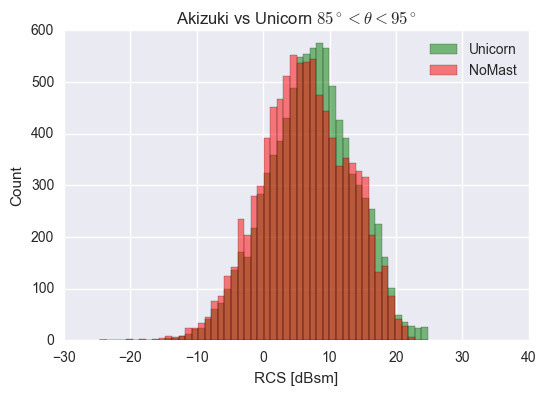

In [109]:
deg5 = merge([df_uni['rcs_d'], df_uni_wo_mast['rcs_d']], ['Unicorn', 'NoMast'])
fig = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 ,color=('g','r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $85^\circ < \\theta < 95^\circ$')

Unicorn(マストあり、ESCあり)とUnicorn(マスト無し)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分がオレンジ色に見えています。
マストを除くと少し値が小さくなりました。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001819B2B0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x00000000193D9160>]], dtype=object)

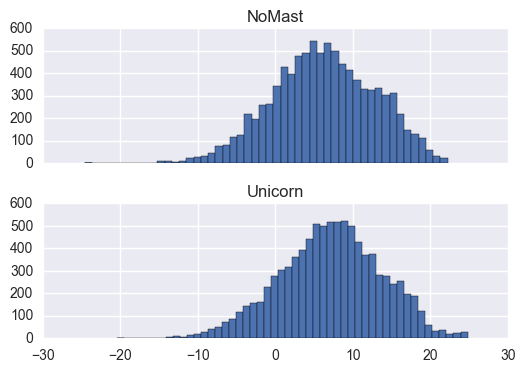

In [110]:
 deg5.hist(bins=50, sharex=True, layout=(2,1))

重ねるか並べるかが違うだけで、データは同じです。

## Unicorn(マスト無し) vs Unicorn(マストとECS無し)

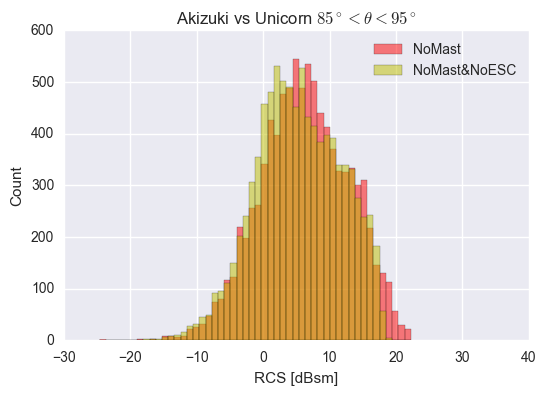

In [111]:
deg5 = merge([ df_uni_wo_mast['rcs_d'],df_uni_wo_mast_esc['rcs_d']], [ 'NoMast','NoMast&NoESC'])
fig = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 ,color=('r','y'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $85^\circ < \\theta < 95^\circ$')

Unicorn(マスト無し)とUnicorn(マスト無し、ESC無し)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分がオレンジ色に見えています。
ECSがないと更に小さくなりました。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B935978>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BB96668>]], dtype=object)

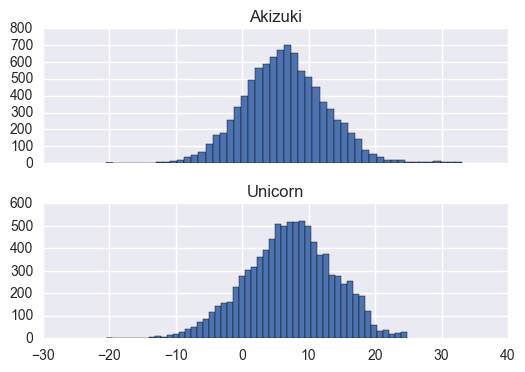

In [134]:
 deg5.hist(bins=50, sharex=True, layout=(2,1))

重ねるか並べるかが違うだけで、データは同じです。

## あきづきマスト vs Unicorn(マスト無し)

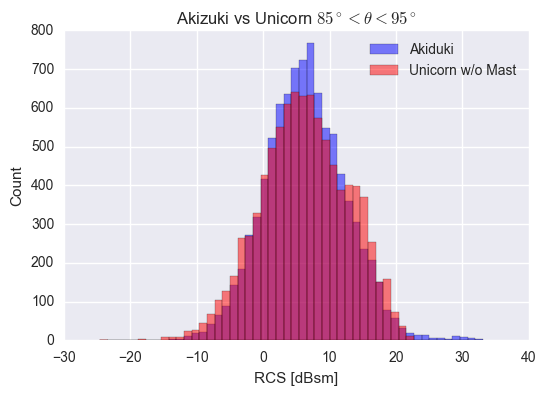

In [135]:
deg5 = merge([df_v3['rcs_d'], df_uni_wo_mast['rcs_d']], [ 'Akiduki', 'Unicorn w/o Mast'])
fig = deg5.plot(y=deg5.columns[:], bins=50, kind='hist', alpha=0.5 ,color=('b','r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn $85^\circ < \\theta < 95^\circ$')

あきづきマストとUnicorn(マスト無し)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分が紫色に見えています。
ほぼ同じ値を示しました。
Unicornについてはマスト無しが最も比較対象として良いモデルと考えられます。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000198F93C8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019B716A0>]], dtype=object)

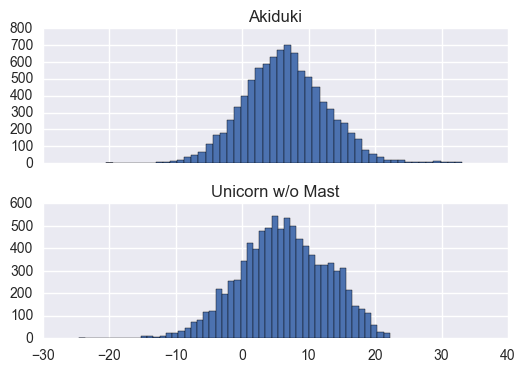

In [114]:
 deg5.hist(bins=50, sharex=True, layout=(2,1))

重ねるか並べるかが違うだけで、データは同じです。

In [115]:
deg5.describe()  # 統計値の確認

,Akiduki,Unicorn w/o Mast
count,9231.000000,9231.000000
mean,6.425531,6.209937
std,6.204805,6.608639
min,-20.536494,-24.600236
25%,2.302330,1.736247
50%,6.293199,6.205483
75%,10.393209,10.982923
max,33.076992,22.206833


上から

* データ数
* 平均値
* 標準偏差
* 最小値
* 第一四分位数
* 中央値
* 第三四分位数
* 最大値

を示しています。

あきづきマストとUnicorn(マスト無し)のデータを$\theta$の振れ幅$\pm5^\circ$で比較したPDFの代表的な統計値です。
グラフの重なりが、平均値、標準偏差、中央値がほぼ6台にあることから推測できます。

### $\theta$ の触れ幅$\pm1^\circ(89 < \theta < 91)$ で比較する

In [133]:
# pm1用のデータを作成
df_v3_nallow=chu(df_v3, 'theta', 89, 91)
df_uni_wo_mast_nallow=chu(df_uni_wo_mast, 'theta', 89, 91)
# pd.merge(df_v3_nallow, df_uni_wo_mast_nallow, on=['theta', 'phi'], how='outer', suffixes=['v3','uni'])  # データの確認

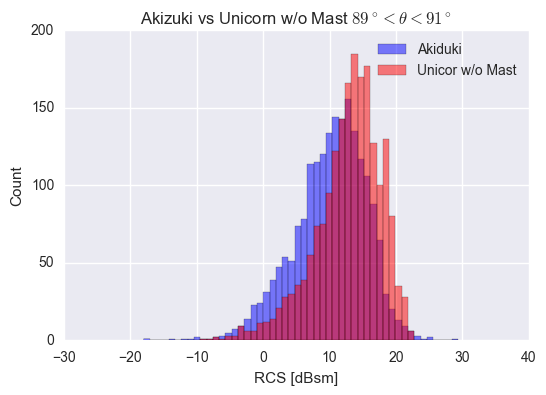

In [120]:
deg1=merge([df_v3_nallow['rcs_d'], df_uni_wo_mast_nallow['rcs_d']], ['Akiduki', 'Unicor w/o Mast'])
fig=deg1.plot(y=deg1.columns[:], bins=50, kind='hist', alpha=0.5, color=('b', 'r'))
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_xlim([-30,40])
fig.set_title('Akizuki vs Unicorn w/o Mast $89^\circ < \\theta < 91^\circ$')

あきづきマストとUnicorn(マスト無し)のデータを$\theta$の振れ幅$\pm1^\circ$で比較したグラフです。
バーに透過度を持たせているので重なっている部分が紫色に見えています。
$\pm5^\circ$のときより水平から照射される割合が高い状態での計算結果を示しています。
あきづきもUnicornも$\pm5^\circ$のときより高い値にシフトしました。
Unicornの方がより高い値にシフトしやすいようです。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000196D6B38>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B4B6C50>]], dtype=object)

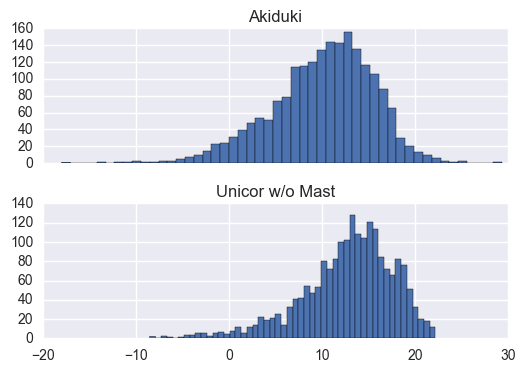

In [121]:
 deg1.hist(bins=50, sharex=True, layout=(2,1))

重ねるか並べるかが違うだけで、データは同じです。

In [139]:
deg1.describe()  # 統計値確認

,Akiduki,Unicor w/o Mast
count,1991.000000,1991.000000
mean,10.100238,12.773531
std,5.482666,4.986195
min,-17.998557,-8.525370
25%,6.877530,10.230980
50%,10.763090,13.471367
75%,13.975028,16.190770
max,29.378457,22.206833


上から

* データ数
* 平均値
* 標準偏差
* 最小値
* 第一四分位数
* 中央値
* 第三四分位数
* 最大値

を示しています。

あきづきマストとUnicorn(マスト無し)のデータを$\theta$の振れ幅$\pm1^\circ$で比較したPDFの代表的な統計値です。
Unicornの平均値、中央値があきづきマストより2~3ポイント高く、グラフが大きく右よりであることがわかります。
このことから、Unicornは水平からの照射であきづきよりも高いRCS値を出すことがわかります。

以上

$\newpage$

___
# ココから下は開発中

## 極座標表示

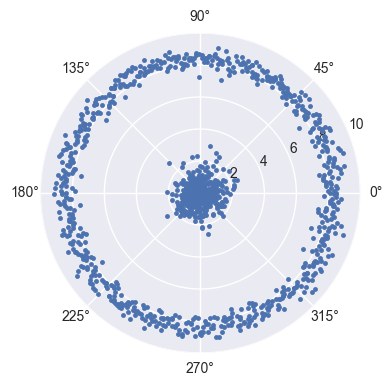

In [15]:
figp=plt.figure()
ax=figp.add_axes([0.1,0.1,0.8,0.8],polar=True)


x=np.arange(-180.0,190.0,10)
theta = (np.pi/180.0 )*x    # in radians
ax.plot(df_esc['phi'], df_esc['rcs_d'],marker='.', lw=0)
ax.set_rmax(10)

グループ分けしないと$\theta$ごとにでない...

In [70]:
grouped=df_esc.groupby(df_esc['THETA[deg]'])

In [74]:
grouped.sum()

,PHI[deg],RCS[W],RCS[dBm^2]
THETA[deg],,,
85.0,64620.0,8669.130600,4972.630031
86.0,64620.0,2465.925970,3002.219890
87.0,64620.0,246.272860,-645.256345
88.0,64620.0,107.452786,-2023.979580
89.0,64620.0,402.648443,135.945933
90.0,64620.0,27.010043,-4617.419168
91.0,64620.0,376.011834,28.637909
92.0,64620.0,116.040661,-1875.689488
93.0,64620.0,245.376115,-644.882977


## esc, esrについての考察

esc, esrは比較的高いRCSが計算された。
高いRCSはどの角度で出現するかを視覚化する。

横軸$\phi$, 縦軸$\theta$で散布図としてプロットした。

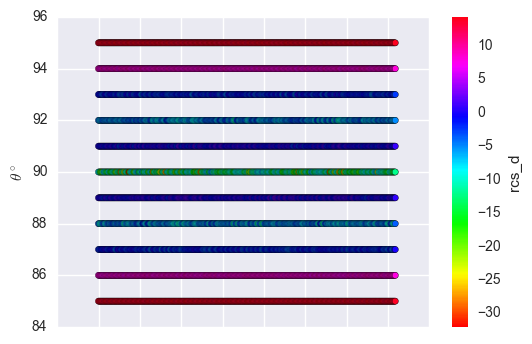

In [61]:
# esc
df_esc.plot(x='phi', y='theta', kind='scatter', c='rcs_d', cmap='hsv')
plt.xlabel('$\phi^\circ$')
plt.ylabel('$\\theta^\circ$')

escは斜入射したときに高いRCSが出ているようである。

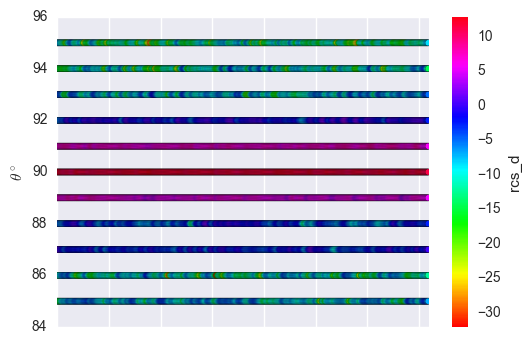

In [62]:
# esr
df_esr.plot(x='phi', y='theta', kind='scatter', c='rcs_d', cmap='hsv')
plt.xlim([0,360])
plt.xlabel('$\phi^\circ$')
plt.ylabel('$\\theta^\circ$')

esrはescとは逆に水平方向から入射したときに高いRCSが出ているようである。

$\newpage$

---
# OLD
ココから下は古いやつ

## rcs_161024_01_wo_mastの結果

### 計算条件

3Dモデルを作成し、FEKOにおいて
Large Element PO法で計算した。
メッシュの大きさはFine(9/5$\lambda$. 10GHzなのでメッシュの大きさ 5.4mm)。

計算方向はthetaに振ってからphiに振る。
つまり、thetaを85-95まで回してから、
phiを次の角度に回す。


* 周波数: 10GHz
* 出力: 1V/m
* 85 $^\circ$ < $\theta$ < 95 $^\circ$ , 1 $^\circ$ 刻み
* 0 $^\circ$ <$\phi$ < 180 $^\circ$ , 10 $^\circ$ 刻み
* $\phi$について、0 $^\circ$ は艦首進行方向、90 $^\circ$ は左舷方向
* $\theta$について、0 $^\circ$ は天頂方向、90 $^\circ$ は水平方向

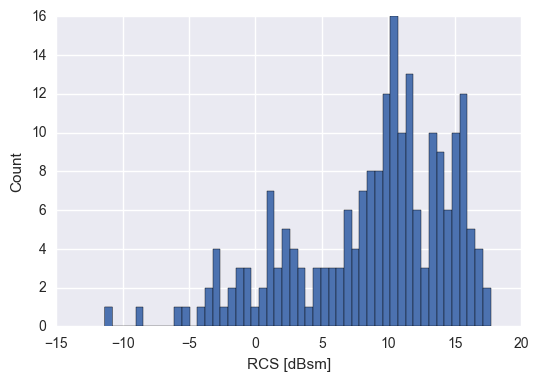

In [40]:
df_wo_mast=read_greped_text('./DATA/rcs_161024_01_wo_mast.grp')
fig = df_wo_mast['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')

___

$\newpage$

### rcs_161024_01_escの結果
旧バージョンESC

<img src="./plot_histgram_files/esc_old.PNG">

\includegraphics{./plot_histgram_files/esc_old.PNG}

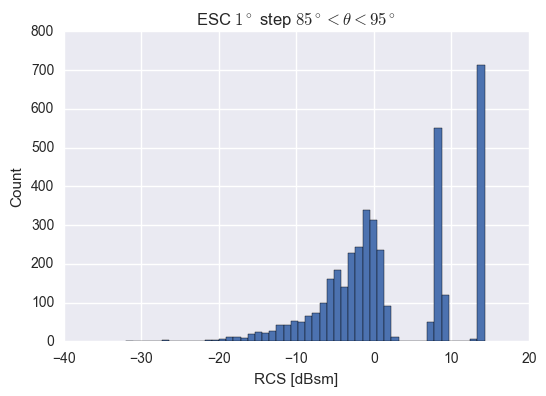

In [71]:
df_esc=read_greped_text('./DATA/rcs_161024_01_esc.grp')
fig = df_esc['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')
fig.set_title('ESC $1^\circ$ step $85^\circ < \\theta < 95^\circ$')
# fig.set_xlim([-40,20])

In [95]:
df_esc

,theta,phi,rcs_w,rcs_d
0,85.0,0.0,24.467000,13.885807
1,86.0,0.0,6.491950,8.123752
2,87.0,0.0,0.808907,-0.921014
3,88.0,0.0,0.477973,-3.205966
4,89.0,0.0,1.134570,0.548313
5,90.0,0.0,0.135452,-8.682146
6,91.0,0.0,1.116040,0.476798
7,92.0,0.0,0.367355,-4.349140
8,93.0,0.0,0.790936,-1.018587
9,94.0,0.0,7.044620,8.478576


In [4]:
df_esc['rcs_d'].describe()  # 統計値の確認

count    3960.000000
mean        1.597312
std         8.281040
min       -32.018779
25%        -3.756818
50%        -0.259316
75%         8.490908
max        14.287388
Name: rcs_d, dtype: float64

___
なんかしらんが二つあったけど一応バックアップ

In [29]:
a=df_wo_mast[df_wo_mast['theta']>=89]
df_wo_mast_nallow=a[a['theta']<=91]
df_wo_mast_nallow.head()  # 最初の５行だけ表示

,theta,phi,rcs_w,rcs_d
20,89.0,0.0,7.60279,8.809730
21,89.2,0.0,57.15800,17.570770
22,89.4,0.0,6.93115,8.408053
23,89.6,0.0,15.62050,11.936949
24,89.8,0.0,8.80903,9.449281


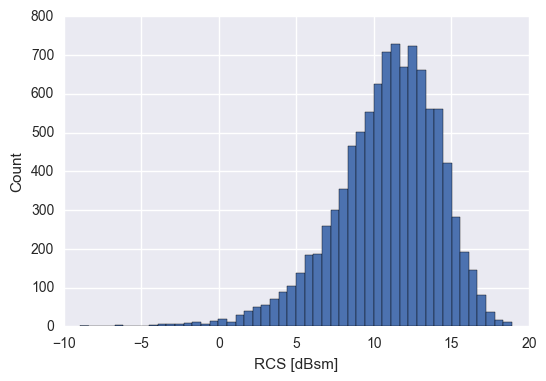

In [30]:
fig = df_wo_mast_nallow['rcs_d'].plot.hist(bins=50)  # ヒストグラムとしてプロット
fig.set_xlabel('RCS [dBsm]')
fig.set_ylabel('Count')

In [31]:
df_wo_mast_nallow['rcs_d'].describe()

count    9911.000000
mean       10.822717
std         3.382037
min        -8.962818
25%         8.926510
50%        11.200011
75%        13.190863
max        18.908154
Name: rcs_d, dtype: float64